In [1]:
!pip install opencv-python-headless
!pip install matplotlib
!pip install scikit-learn

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

In [3]:
def apply_gaussian_blur(image, kernel_size=(5, 5), sigma=1.0):
    return cv2.GaussianBlur(image, kernel_size, sigma)

def apply_sobel_edge_detection(image, ksize=3):
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=ksize)
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=ksize)
    magnitude = cv2.magnitude(grad_x, grad_y)
    return magnitude

def resize_image(image, size=(64, 64)):
    return cv2.resize(image, size)


In [4]:
def prepare_dataset(images, labels):
    X = np.array([img.flatten() for img in images])
    y = np.array(labels)
    return train_test_split(X, y, test_size=0.2, random_state=42)

def train_knn_classifier(X_train, y_train, n_neighbors=3):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    return knn

def evaluate_classifier(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)


Saving Screenshot 2023-09-19 181445.png to Screenshot 2023-09-19 181445 (4).png


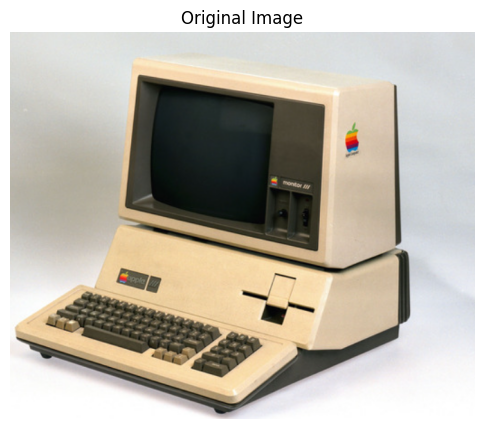

In [29]:
# Load an example image (You can upload your own image to Colab)
from google.colab import files
uploaded = files.upload()

image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()


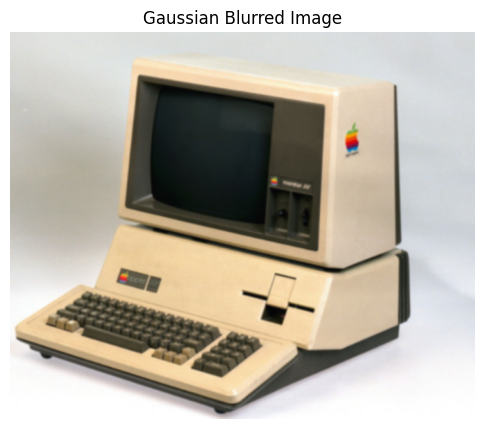

In [30]:
blurred_image = apply_gaussian_blur(image_rgb)

plt.figure(figsize=(6, 6))
plt.imshow(blurred_image, cmap='gray')
plt.title('Gaussian Blurred Image')
plt.axis('off')
plt.show()


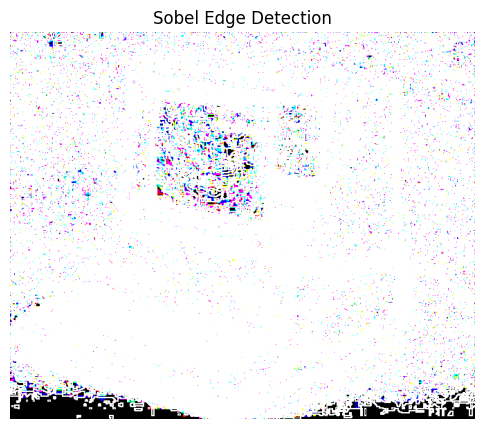

In [40]:
edge_image = apply_sobel_edge_detection(image_rgb)

plt.figure(figsize=(6, 6))
plt.imshow(edge_image)
plt.title('Sobel Edge Detection')
plt.axis('off')
plt.show()


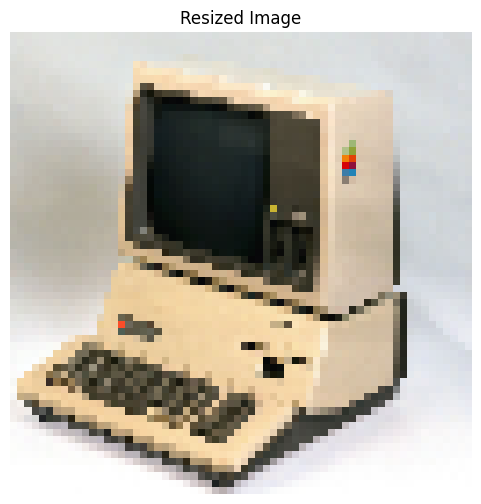

Image saved to /content/resizedd.jpg
Image saved to /content/blurred.jpg
Image saved to /content/edgee.jpg


In [39]:
resized_image = resize_image(image_rgb)

plt.figure(figsize=(6, 6))
plt.imshow(resized_image, cmap='gray')
plt.title('Resized Image')
plt.axis('off')
plt.show()

output_path = '/content/resizedd.jpg'
image_rgb_bgr = cv2.cvtColor(resized_image, cv2.COLOR_RGB2BGR)  # Convert back to BGR for saving
cv2.imwrite(output_path, image_rgb_bgr)
print(f"Image saved to {output_path}")

output_path = '/content/blurred.jpg'
image_rgb_bgr = cv2.cvtColor(blurred_image, cv2.COLOR_RGB2BGR)  # Convert back to BGR for saving
cv2.imwrite(output_path, image_rgb_bgr)
print(f"Image saved to {output_path}")


output_path = '/content/edgee.jpg'
edge_image_8u=cv2.convertScaleAbs(edge_image)
image_rgb_bgr = cv2.cvtColor(edge_image_8u, cv2.COLOR_RGB2BGR)  # Convert back to BGR for saving
cv2.imwrite(output_path, image_rgb_bgr)
print(f"Image saved to {output_path}")

In [46]:
# create a small synthetic dataset
images = [resized_image for _ in range(10)]  # Using the same image for simplicity
labels = [0 for _ in range(5)] + [1 for _ in range(5)]  # Two classes

X_train, X_test, y_train, y_test = prepare_dataset(images, labels)


In [34]:
knn_model = train_knn_classifier(X_train, y_train)


In [35]:
accuracy = evaluate_classifier(knn_model, X_test, y_test)
print(f"KNN Classifier Accuracy: {accuracy * 100:.2f}%")


KNN Classifier Accuracy: 50.00%
